In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

# ----------------------------------------------------
import sklearn
import scipy
import statsmodels.api as sm 
from scipy.stats import shapiro

# ----------------------------------------------------
# # # from lightgbm import LGBMClassifier
# # from xgboost import XGBClassifier
# from sklearn.ensemble import AdaBoostClassifier

# ----------------------------------------------------
from sklearn.metrics import auc, roc_curve, roc_auc_score
from collections import Counter

In [2]:
train=pd.read_csv(r'C:\Users\yash.bansal\Downloads\home-credit-default-risk\application_train.csv')

test=pd.read_csv(r'C:\Users\yash.bansal\Downloads\home-credit-default-risk\application_test.csv')



In [3]:
train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

Text(0, 0.5, 'count in dataset')

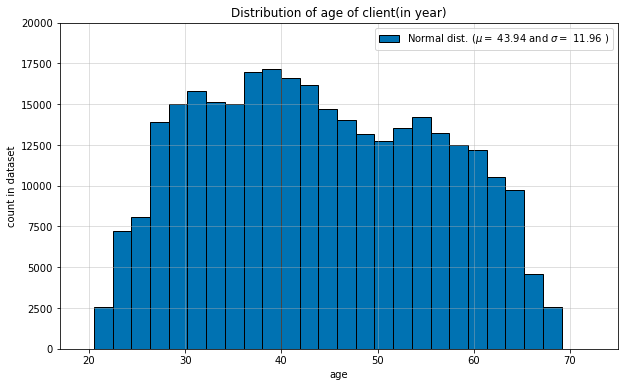

In [86]:
from scipy.stats import norm,skew
age_years=train['DAYS_BIRTH']/-365 # -ve because days_birth is given in negative in dataset
plt.figure(figsize=(10,6))
plt.style.use('seaborn-colorblind')
plt.grid(True,alpha=0.5)
plt.hist(age_years,edgecolor='k',bins=25)
plt.xlim(17,75)
plt.ylim(0,20000)
(mu,sigma)=norm.fit(age_years)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Distribution of age of client(in year)')
plt.xlabel('age')
plt.ylabel('count in dataset')

Text(0.5, 1.0, 'Distribution of age of client')

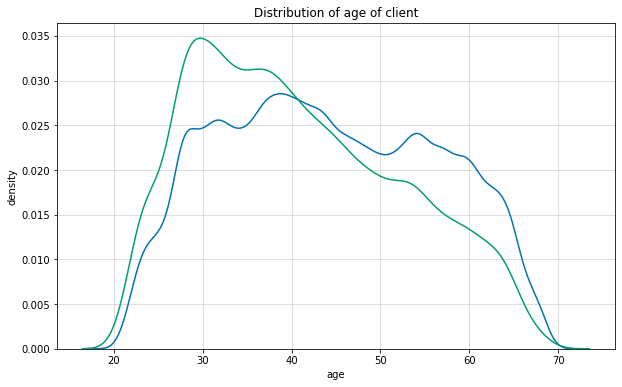

In [87]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-colorblind')
plt.grid(True,alpha=0.5)
sns.kdeplot(train.loc[train['TARGET']==0,'DAYS_BIRTH']/-365,label='Repaid loans')

sns.kdeplot(train.loc[train['TARGET']==1,'DAYS_BIRTH']/-365,label='Not Repaid loans')
plt.xlabel('age')
plt.ylabel('density')
plt.title('Distribution of age of client')

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

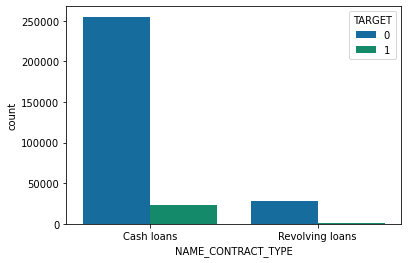

In [90]:
sns.countplot(train['NAME_CONTRACT_TYPE'],hue=train['TARGET'])

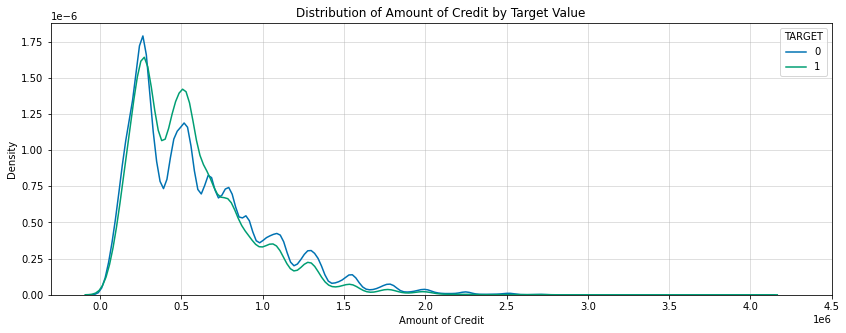

In [95]:
plt.figure(figsize=(14,5))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(train.loc[train['TARGET'] == 0, 'AMT_CREDIT'], 
            label = 'Repaid Loan',hue=train['TARGET'])
sns.kdeplot(train.loc[train['TARGET'] == 1, 'AMT_CREDIT'], 
            label = 'Not Repaid Loan',hue=train['TARGET'])
plt.xlabel('Amount of Credit')
plt.xticks(np.arange(0, 5000000, 500000))
plt.ylabel('Density')
plt.title('Distribution of Amount of Credit by Target Value');

In [4]:
test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [5]:
print(train.info())
print('***************')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
***************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


In [6]:
pd.set_option('display.max_rows',train.shape[0])
train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [7]:
pd.DataFrame(train.isnull().sum().sort_values(ascending=False))

,0
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
NONLIVINGAPARTMENTS_MEDI,213514
FONDKAPREMONT_MODE,210295
LIVINGAPARTMENTS_MODE,210199
LIVINGAPARTMENTS_AVG,210199
LIVINGAPARTMENTS_MEDI,210199


In [8]:
pd.DataFrame(test.isnull().sum().sort_values(ascending=False))

,0
COMMONAREA_AVG,33495
COMMONAREA_MODE,33495
COMMONAREA_MEDI,33495
NONLIVINGAPARTMENTS_AVG,33347
NONLIVINGAPARTMENTS_MODE,33347
NONLIVINGAPARTMENTS_MEDI,33347
FONDKAPREMONT_MODE,32797
LIVINGAPARTMENTS_AVG,32780
LIVINGAPARTMENTS_MODE,32780
LIVINGAPARTMENTS_MEDI,32780


In [105]:
threshold_train=len(train)*0.60
threshold_test=len(test)*0.60
print(threshold_train)
print(threshold_test)

184506.6
29246.399999999998


In [10]:
print(train.columns[train.isnull().sum()>int(threshold_train)])
print('*************************************************')
print(test.columns[test.isnull().sum()>int(threshold_test)])

Index(['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG',
       'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'FONDKAPREMONT_MODE'],
      dtype='object')
*************************************************
Index(['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG',
       'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'FONDKAPREMONT_MODE'],
      dtype='object')


In [11]:
train_new=train.dropna(axis=1,thresh=threshold_train)
print(train_new.shape)
test_new=test.dropna(axis=1,thresh=threshold_test)
print(test_new.shape)

(307511, 73)
(48744, 72)


In [106]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  int32  
 3   CODE_GENDER                  307511 non-null  int32  
 4   FLAG_OWN_CAR                 307511 non-null  int32  
 5   FLAG_OWN_REALTY              307511 non-null  int32  
 6   CNT_CHILDREN                 307511 non-null  float64
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  int32  
 12  NAME_INCOME_TYPE             307511 non-null  int32  
 13 

In [12]:
numeric_feature = train_new.dtypes!=object
final_numeric_feature = train_new.columns[numeric_feature].tolist()

#----------------------------------------------------
numeric_feature_test = test_new.dtypes!=object
final_numeric_feature_test = test_new.columns[numeric_feature_test].tolist()

In [13]:
numeric = train_new[final_numeric_feature]

#-------------------------------------------
numeric_test = test_new[final_numeric_feature_test]
numeric.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
discrete_features = numeric.dtypes=='int64'
final_discrete_feature = numeric.columns[discrete_features].tolist()
discrete = numeric[final_discrete_feature]

#-------------------------------------------
discrete_features_test = numeric_test.dtypes=='int64'
final_discrete_feature_test = numeric_test.columns[discrete_features_test].tolist()
discrete_test = numeric_test[final_discrete_feature_test]

discrete.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,-9461,-637,-2120,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-2531,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
pd.DataFrame(discrete.isnull().sum().sort_values(ascending=False))

,0
SK_ID_CURR,0
FLAG_DOCUMENT_2,0
FLAG_DOCUMENT_4,0
FLAG_DOCUMENT_5,0
FLAG_DOCUMENT_6,0
FLAG_DOCUMENT_7,0
FLAG_DOCUMENT_8,0
FLAG_DOCUMENT_9,0
FLAG_DOCUMENT_10,0
FLAG_DOCUMENT_11,0


In [16]:
pd.DataFrame(discrete_test.isnull().sum().sort_values(ascending=False))

,0
SK_ID_CURR,0
CNT_CHILDREN,0
FLAG_DOCUMENT_4,0
FLAG_DOCUMENT_5,0
FLAG_DOCUMENT_6,0
FLAG_DOCUMENT_7,0
FLAG_DOCUMENT_8,0
FLAG_DOCUMENT_9,0
FLAG_DOCUMENT_10,0
FLAG_DOCUMENT_11,0


In [17]:
continuous_features=numeric.dtypes==float
final_continuous_feature=numeric.columns[continuous_features.tolist()]
continuous=numeric[final_continuous_feature]
#-----------------------------------------------------
continuous_features_test=numeric_test.dtypes==float
final_continuous_feature_test=numeric_test.columns[continuous_features_test.tolist()]
continuous_test=numeric_test[final_continuous_feature_test]

In [18]:
continuous.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,1.0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,2.0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,1.0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,2.0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,1.0,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
pd.DataFrame(continuous.isnull().sum().sort_values(ascending=False))

,0
EXT_SOURCE_3,60965
AMT_REQ_CREDIT_BUREAU_YEAR,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_HOUR,41519
OBS_60_CNT_SOCIAL_CIRCLE,1021
DEF_60_CNT_SOCIAL_CIRCLE,1021
DEF_30_CNT_SOCIAL_CIRCLE,1021


In [20]:
pd.DataFrame(continuous_test.isnull().sum().sort_values(ascending=False))

,0
EXT_SOURCE_3,8668
AMT_REQ_CREDIT_BUREAU_YEAR,6049
AMT_REQ_CREDIT_BUREAU_QRT,6049
AMT_REQ_CREDIT_BUREAU_MON,6049
AMT_REQ_CREDIT_BUREAU_WEEK,6049
AMT_REQ_CREDIT_BUREAU_DAY,6049
AMT_REQ_CREDIT_BUREAU_HOUR,6049
OBS_60_CNT_SOCIAL_CIRCLE,29
DEF_60_CNT_SOCIAL_CIRCLE,29
DEF_30_CNT_SOCIAL_CIRCLE,29


In [21]:
continuous_col = continuous.columns
continuous_col

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [22]:
Q1 = train_new.quantile(0.25)
Q3 = train_new.quantile(0.75)
IQR = Q3 - Q1

In [107]:
print('Q1',Q1)
print('Q3',Q3)
print('IQR',IQR)

Q1 SK_ID_CURR                     189145.500000
TARGET                              0.000000
CNT_CHILDREN                        0.000000
AMT_INCOME_TOTAL               112500.000000
AMT_CREDIT                     270000.000000
AMT_ANNUITY                     16524.000000
AMT_GOODS_PRICE                238500.000000
REGION_POPULATION_RELATIVE          0.010006
DAYS_BIRTH                     -19682.000000
DAYS_EMPLOYED                   -2760.000000
DAYS_REGISTRATION               -7479.500000
DAYS_ID_PUBLISH                 -4299.000000
FLAG_MOBIL                          1.000000
FLAG_EMP_PHONE                      1.000000
FLAG_WORK_PHONE                     0.000000
FLAG_CONT_MOBILE                    1.000000
FLAG_PHONE                          0.000000
FLAG_EMAIL                          0.000000
CNT_FAM_MEMBERS                     2.000000
REGION_RATING_CLIENT                2.000000
REGION_RATING_CLIENT_W_CITY         2.000000
HOUR_APPR_PROCESS_START            10.000000
REG_REG

In [23]:
def outlier_detect(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    return df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))]

# ----------------------------------------------------------
def lower_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = df[(df[col] < (q1_col - 1.5 * iqr_col))]
    return lower

# ----------------------------------------------------------
def upper_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    upper = df[(df[col] > (q3_col + 1.5 * iqr_col))]
    return upper

# ----------------------------------------------------------
def preprocess(df, col):
    print("*********************** {} ***********************\n".format(col))
    print("lower outlier: {} ****** upper outlier: {}\n".format(lower_outlier(df,col).shape[0], upper_outlier(df,col).shape[0]))
    plt.figure(figsize=(10,8))
    plt.subplot(2,1,1)
    df[col].plot(kind='box', subplots=True, sharex=False, vert=False)
    plt.subplot(2,1,2)
    df[col].plot(kind='density', subplots=True, sharex=False)
    plt.show()

# ----------------------------------------------------------
def preprocess_cat(df, col):
    print("******************** {} ********************\n".format(col))
    df[col].value_counts().plot(kind='bar')
    plt.xticks(rotation='vertical')
    plt.show()
    
# ----------------------------------------------------------
def replace_upper(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 9999999
    upper = q3_col + 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x < (upper)), tmp)
    df[col] = df[col].replace(tmp, upper)
# for i in range(len(col_names)):
#     replace_upper(numeric, col_names[i])
# ----------------------------------------------------------
def replace_lower(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 1111111
    lower = q1_col - 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x > (lower)), tmp)
    df[col] = df[col].replace(tmp, lower)

# ----------------------------------------------------------
def replace_mode(df, col):
    df[col] = df[col].fillna(df[col].mode()[0])
    print("NaN in {} raplaced with {}".format(col, df[col].mode()[0]))

# ----------------------------------------------------------
def replace_mean(df, col):
    df[col] = df[col].fillna(df[col].mean())
    print("NaN in {} raplaced with {}".format(col, df[col].mean()))
# for i in range(len(final_continuous_feature)):
#     replace_mean(continuous, final_continuous_feature[i])    

def replace_median(df, col):
    df[col] = df[col].fillna(df[col].median())
    print("NaN in {} raplaced with {}".format(col, df[col].median()))
    

# ----------------------------------------------------------
kfold = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

def cross_validation(x, y, model):
    result= cross_val_score(model, x, y, cv=kfold, scoring="roc_auc", n_jobs=-1)
    print("Score: %f" % result.mean())
    
# ----------------------------------------------------------
def RndSrch_Tune(model, X, y, params):
    
    clf = RandomizedSearchCV(model, params, scoring ='roc_auc', cv = kfold, n_jobs=-1, random_state=100)
    clf.fit(X, y)
    print("best score is :" , clf.best_score_)
    print("best estimator is :" , clf.best_estimator_)
    print("best Params is :" , clf.best_params_)
    return (clf.best_score_)

In [115]:
# continuous['AMT_INCOME_TOTAL'].describe()
# m = Q1['AMT_INCOME_TOTAL']
# n=Q3['AMT_INCOME_TOTAL']
# o=IQR['AMT_INCOME_TOTAL']
# print(m,   n,    o)
# tmp = 1111111
# lower1 = m - 1.5 * o
# print(lower1)
# df[col] = df[col].where(lambda x: (x > (lower)), tmp)
# df[col] = df[col].replace(tmp, lower)

112500.0 202500.0 90000.0
-22500.0


*********************** AMT_INCOME_TOTAL ***********************

lower outlier: 0 ****** upper outlier: 14035



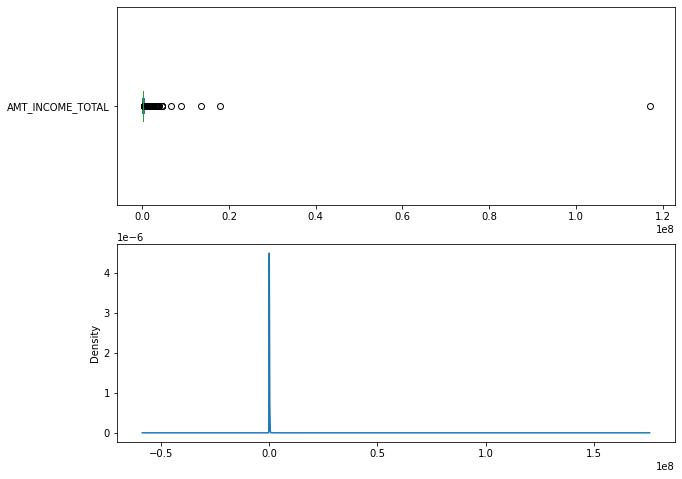

*********************** AMT_CREDIT ***********************

lower outlier: 0 ****** upper outlier: 6562



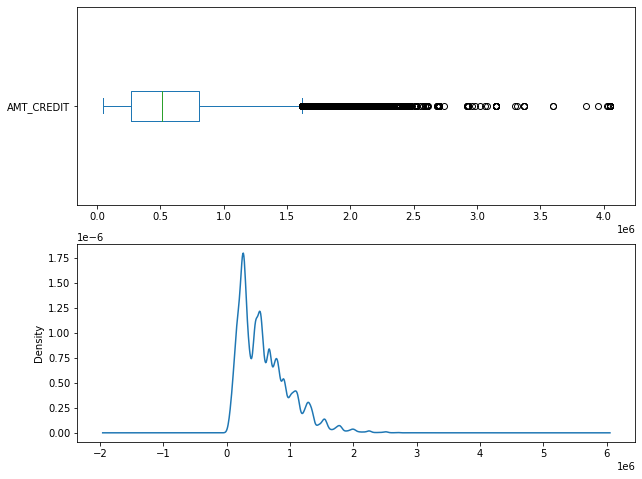

*********************** AMT_ANNUITY ***********************

lower outlier: 0 ****** upper outlier: 7504



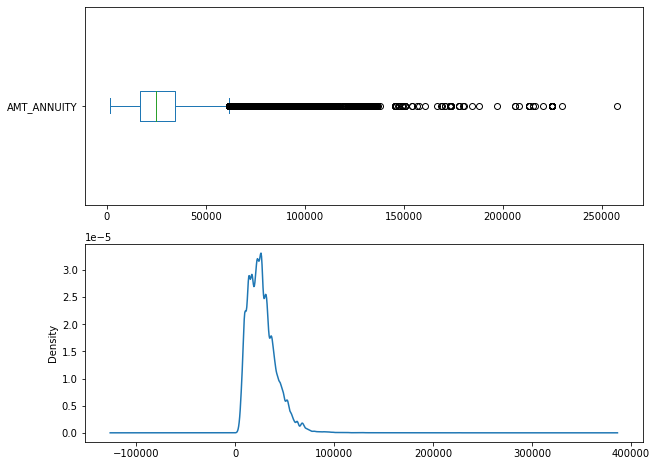

*********************** AMT_GOODS_PRICE ***********************

lower outlier: 0 ****** upper outlier: 14728



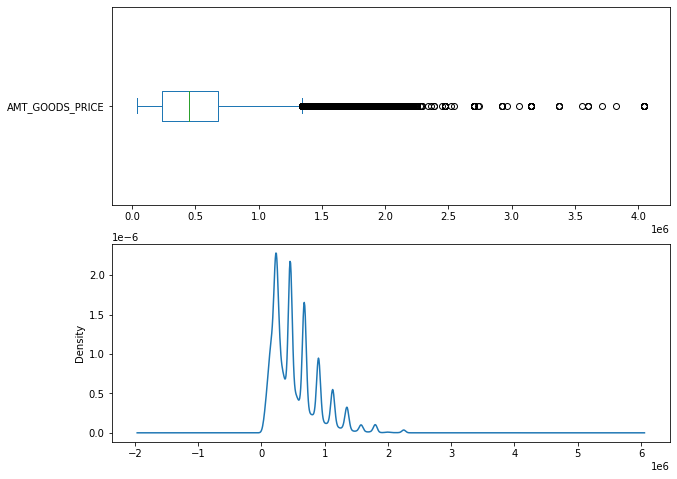

*********************** REGION_POPULATION_RELATIVE ***********************

lower outlier: 0 ****** upper outlier: 8412



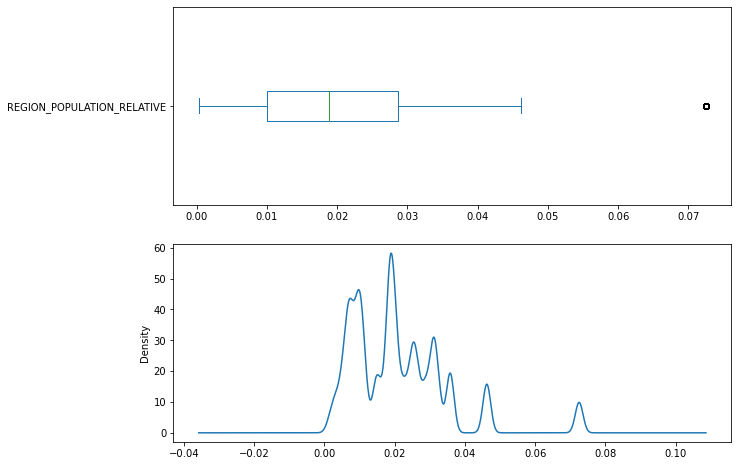

*********************** DAYS_REGISTRATION ***********************

lower outlier: 659 ****** upper outlier: 0



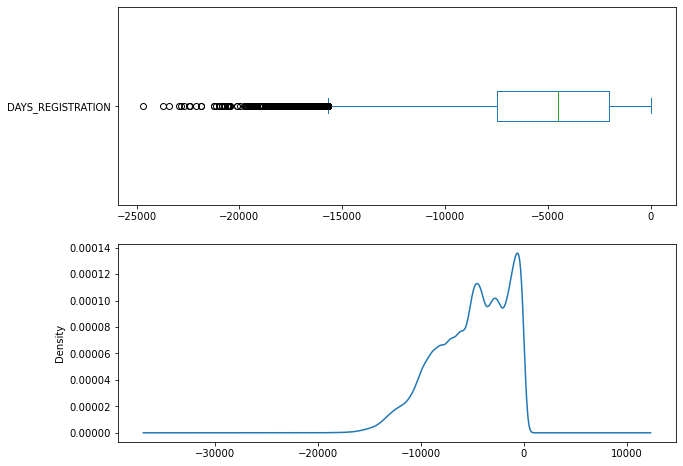

*********************** CNT_FAM_MEMBERS ***********************

lower outlier: 0 ****** upper outlier: 4007



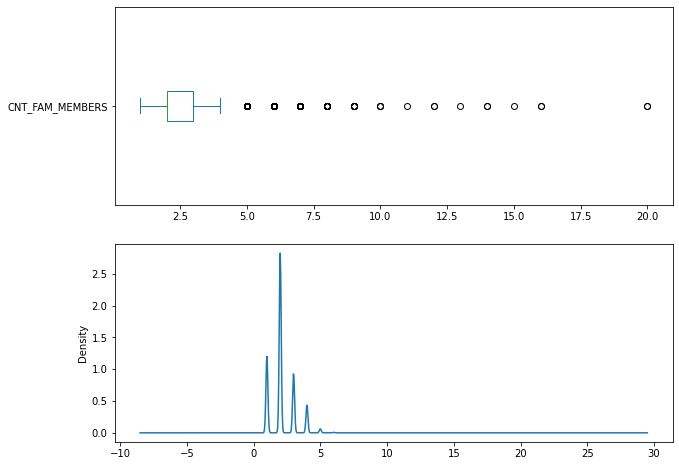

*********************** EXT_SOURCE_2 ***********************

lower outlier: 0 ****** upper outlier: 0



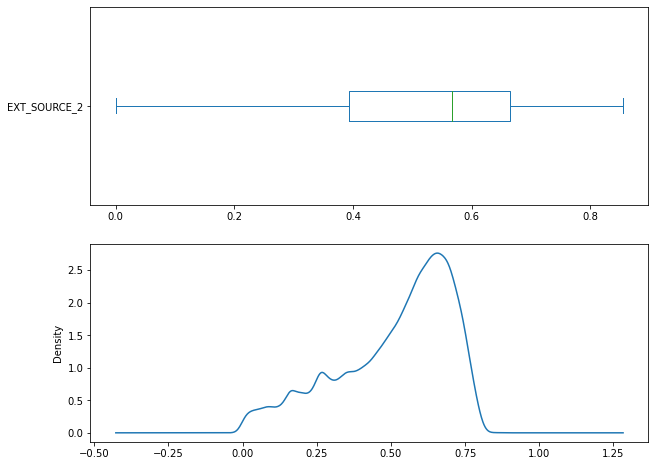

*********************** EXT_SOURCE_3 ***********************

lower outlier: 0 ****** upper outlier: 0



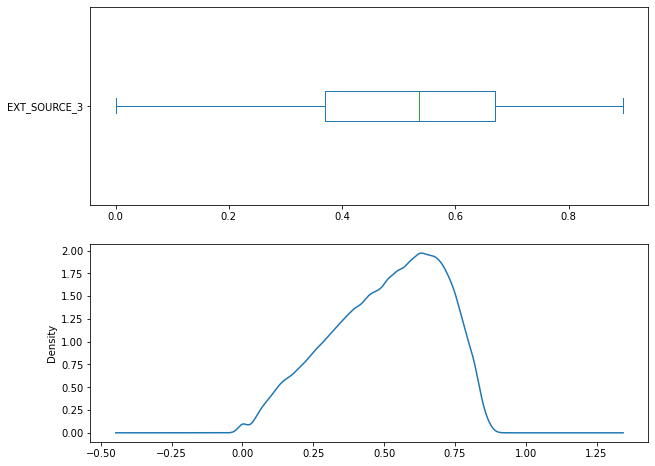

*********************** OBS_30_CNT_SOCIAL_CIRCLE ***********************

lower outlier: 0 ****** upper outlier: 19971



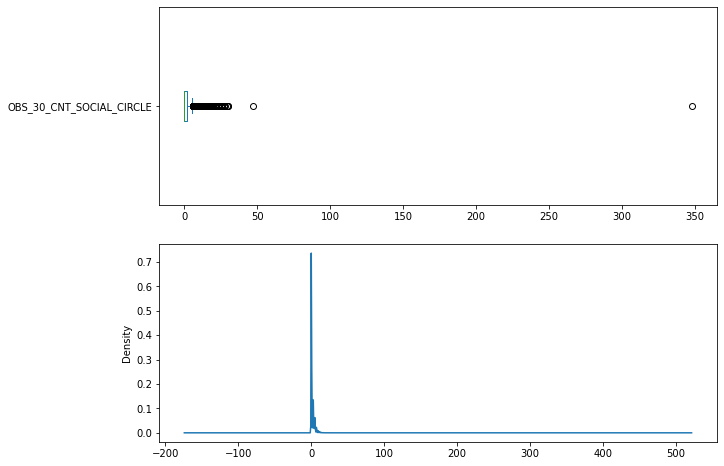

*********************** DEF_30_CNT_SOCIAL_CIRCLE ***********************

lower outlier: 0 ****** upper outlier: 35166



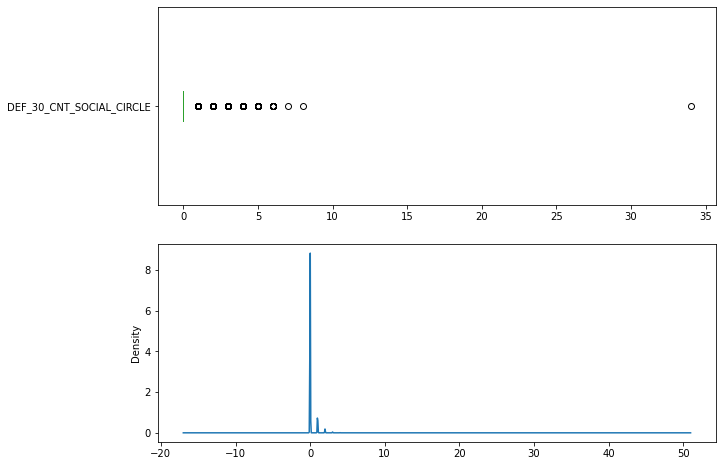

*********************** OBS_60_CNT_SOCIAL_CIRCLE ***********************

lower outlier: 0 ****** upper outlier: 19564



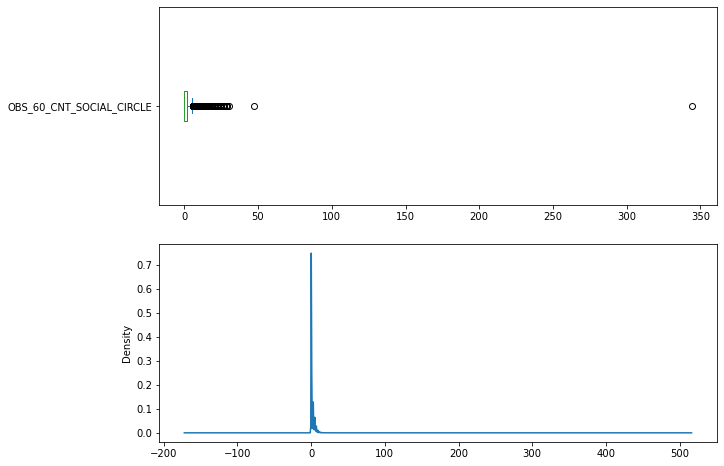

*********************** DEF_60_CNT_SOCIAL_CIRCLE ***********************

lower outlier: 0 ****** upper outlier: 25769



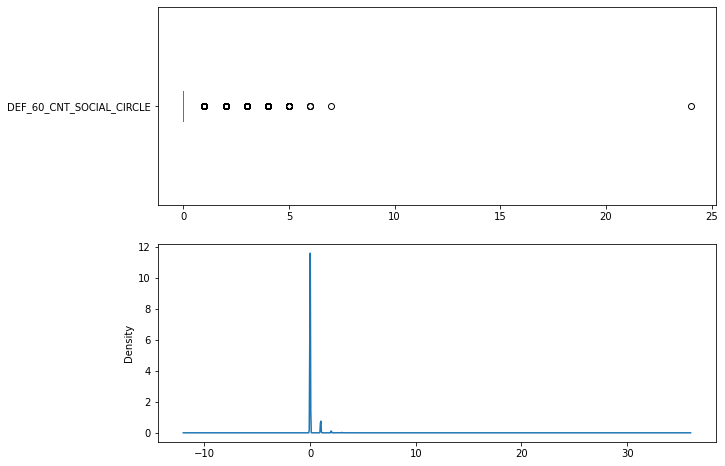

*********************** DAYS_LAST_PHONE_CHANGE ***********************

lower outlier: 435 ****** upper outlier: 0



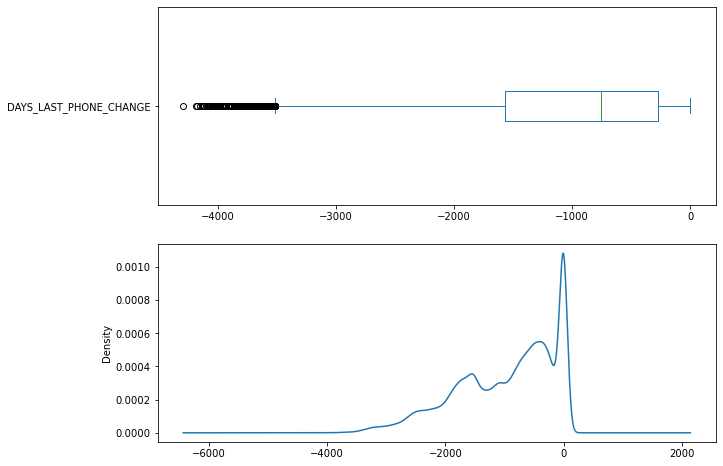

*********************** AMT_REQ_CREDIT_BUREAU_HOUR ***********************

lower outlier: 0 ****** upper outlier: 1626



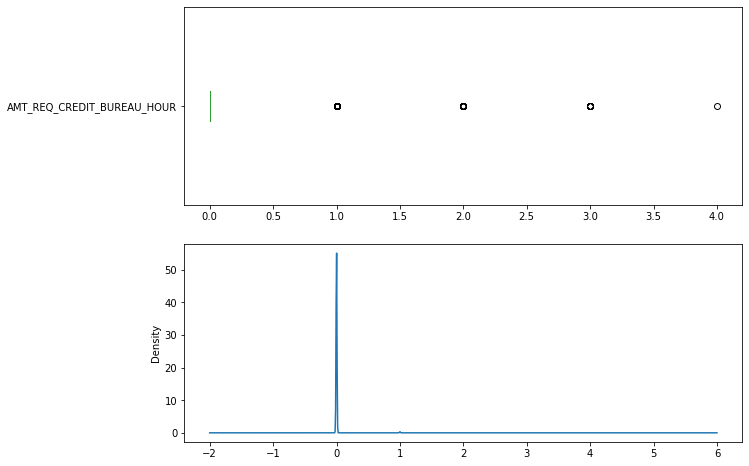

*********************** AMT_REQ_CREDIT_BUREAU_DAY ***********************

lower outlier: 0 ****** upper outlier: 1489



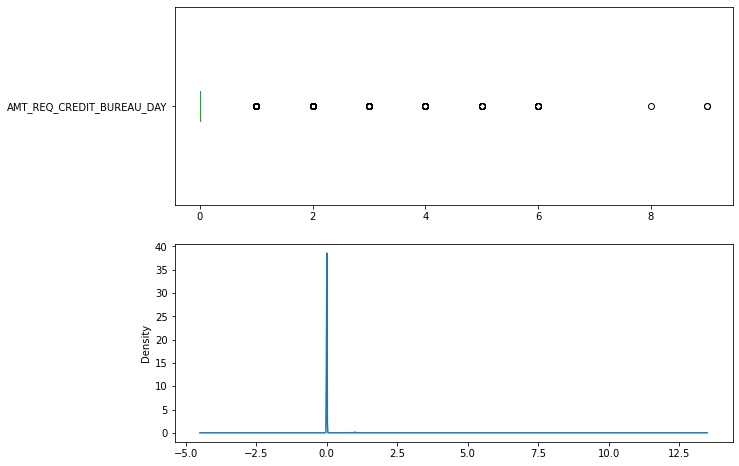

*********************** AMT_REQ_CREDIT_BUREAU_WEEK ***********************

lower outlier: 0 ****** upper outlier: 8536



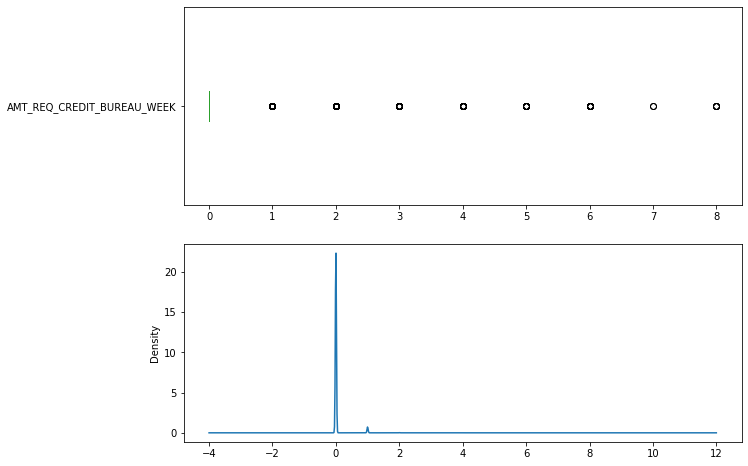

*********************** AMT_REQ_CREDIT_BUREAU_MON ***********************

lower outlier: 0 ****** upper outlier: 43759



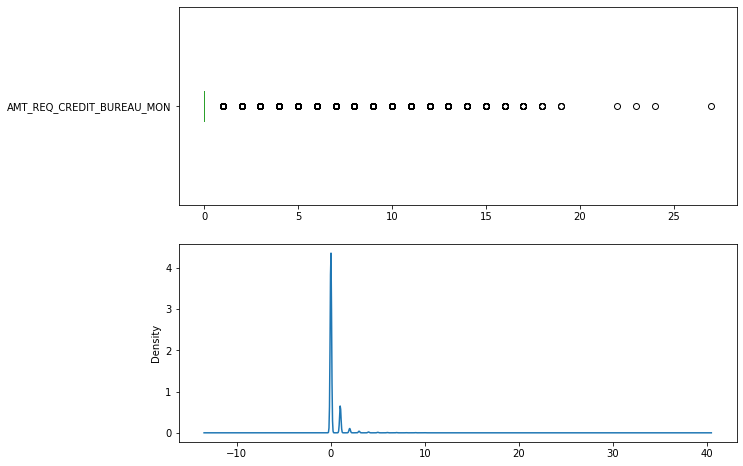

*********************** AMT_REQ_CREDIT_BUREAU_QRT ***********************

lower outlier: 0 ****** upper outlier: 50575



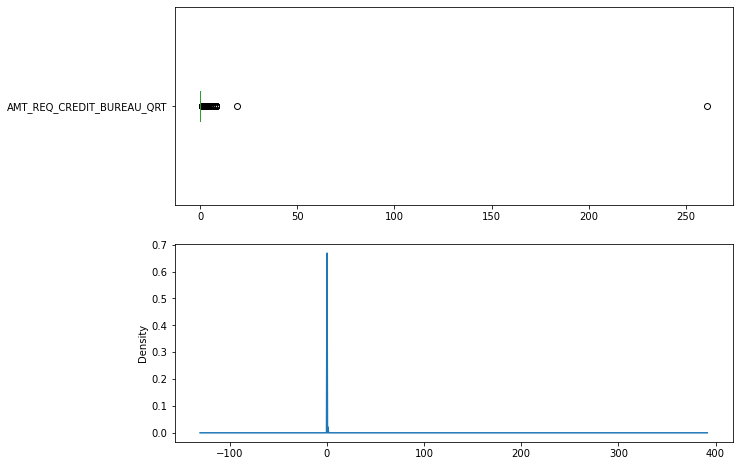

*********************** AMT_REQ_CREDIT_BUREAU_YEAR ***********************

lower outlier: 0 ****** upper outlier: 3364



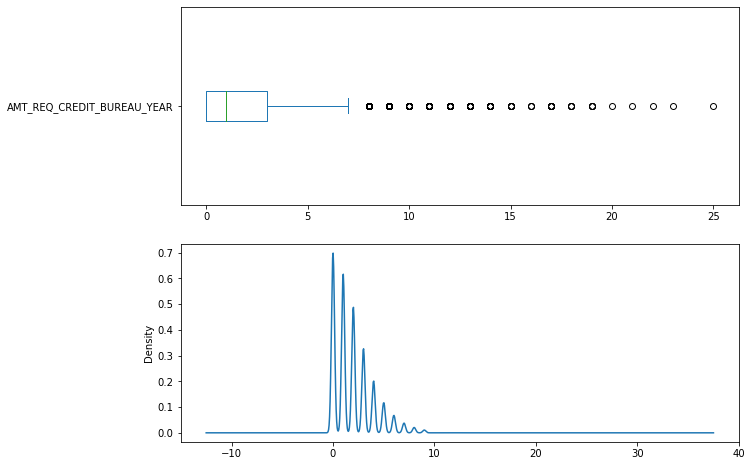

In [24]:
for i in range(len(continuous_col)):
    preprocess(continuous[continuous_col],continuous_col[i])
    
# def preprocess(df, col):
#     print("*********************** {} ***********************\n".format(col))
#     print("lower outlier: {} ****** upper outlier: {}\n".format(lower_outlier(df,col).shape[0], upper_outlier(df,col).shape[0]))
#     plt.figure(figsize=(10,8))
#     plt.subplot(2,1,1)
#     df[col].plot(kind='box', subplots=True, sharex=False, vert=False)
#     plt.subplot(2,1,2)
#     df[col].plot(kind='density', subplots=True, sharex=False)
#     plt.show()

# def replace_upper(df, col):
#     q1_col = Q1[col]
#     iqr_col = IQR[col]
#     q3_col = Q3[col]
#     tmp = 9999999
#     upper = q3_col + 1.5 * iqr_col
#     df[col] = df[col].where(lambda x: (x < (upper)), tmp)
#     df[col] = df[col].replace(tmp, upper)
# # for i in range(len(col_names)):
# #     replace_upper(numeric, col_names[i])
# # ----------------------------------------------------------
# def replace_lower(df, col):
#     q1_col = Q1[col]
#     iqr_col = IQR[col]
#     q3_col = Q3[col]
#     tmp = 1111111
#     lower = q1_col - 1.5 * iqr_col
#     df[col] = df[col].where(lambda x: (x > (lower)), tmp)
#     df[col] = df[col].replace(tmp, lower)

In [25]:
continuous.isnull().sum()

AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
REGION_POPULATION_RELATIVE        0
DAYS_REGISTRATION                 0
CNT_FAM_MEMBERS                   2
EXT_SOURCE_2                    660
EXT_SOURCE_3                  60965
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [26]:
continuous_is_null = continuous.isnull().sum() != 0
final_continuous_feature = continuous.columns[continuous_is_null].tolist()
print("In train: \n",final_continuous_feature)

print("****************************************")
continuous_is_null_test = continuous_test.isnull().sum() != 0
final_continuous_feature_test = continuous_test.columns[continuous_is_null_test].tolist()
print("In test: \n",final_continuous_feature_test)

In train: 
 ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
****************************************
In test: 
 ['AMT_ANNUITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [27]:
print("In train:\n")
for i in range(len(final_continuous_feature)):
    replace_mean(continuous, final_continuous_feature[i])

print("************************************")
print("In test:\n")
for i in range(len(final_continuous_feature_test)):
    replace_mean(continuous_test, final_continuous_feature_test[i])

In train:

NaN in AMT_ANNUITY raplaced with 27108.573909183444
NaN in AMT_GOODS_PRICE raplaced with 538396.2074288887
NaN in CNT_FAM_MEMBERS raplaced with 2.1526654504421012
NaN in EXT_SOURCE_2 raplaced with 0.5143926741308488
NaN in EXT_SOURCE_3 raplaced with 0.5108529061805426
NaN in OBS_30_CNT_SOCIAL_CIRCLE raplaced with 1.4222454239942892
NaN in DEF_30_CNT_SOCIAL_CIRCLE raplaced with 0.1434206662533827
NaN in OBS_60_CNT_SOCIAL_CIRCLE raplaced with 1.4052921791902133
NaN in DEF_60_CNT_SOCIAL_CIRCLE raplaced with 0.10004894123788487
NaN in DAYS_LAST_PHONE_CHANGE raplaced with -962.8587883320869
NaN in AMT_REQ_CREDIT_BUREAU_HOUR raplaced with 0.0064024481939340665
NaN in AMT_REQ_CREDIT_BUREAU_DAY raplaced with 0.007000210532644792
NaN in AMT_REQ_CREDIT_BUREAU_WEEK raplaced with 0.03436193569730462
NaN in AMT_REQ_CREDIT_BUREAU_MON raplaced with 0.26739526000773584
NaN in AMT_REQ_CREDIT_BUREAU_QRT raplaced with 0.2654741495984415
NaN in AMT_REQ_CREDIT_BUREAU_YEAR raplaced with 1.8999744

In [28]:
pd.DataFrame(continuous.isnull().sum().sort_values(ascending=False))

,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_REQ_CREDIT_BUREAU_QRT,0
AMT_REQ_CREDIT_BUREAU_MON,0
AMT_REQ_CREDIT_BUREAU_WEEK,0
AMT_REQ_CREDIT_BUREAU_DAY,0
AMT_REQ_CREDIT_BUREAU_HOUR,0
DAYS_LAST_PHONE_CHANGE,0
DEF_60_CNT_SOCIAL_CIRCLE,0
OBS_60_CNT_SOCIAL_CIRCLE,0


In [29]:
pd.DataFrame(continuous_test.isnull().sum().sort_values(ascending=False))

,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_REQ_CREDIT_BUREAU_QRT,0
AMT_REQ_CREDIT_BUREAU_MON,0
AMT_REQ_CREDIT_BUREAU_WEEK,0
AMT_REQ_CREDIT_BUREAU_DAY,0
AMT_REQ_CREDIT_BUREAU_HOUR,0
DAYS_LAST_PHONE_CHANGE,0
DEF_60_CNT_SOCIAL_CIRCLE,0
OBS_60_CNT_SOCIAL_CIRCLE,0


In [30]:
numeric[continuous_col] = continuous[continuous_col]

# ----------------------------------------------
numeric_test[continuous_col] = continuous_test[continuous_col]

Manage outlier

In [31]:
col_names = numeric.columns

# ------------------------------------
col_names_test = numeric_test.columns

In [32]:
col_names

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMEN

In [33]:
print("In train:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(outlier_detect(numeric,col_names[i]).shape[0])))
    
print("\n\n***************************************\n")
print("In test:\n")
for i in range(len(col_names_test)):
    print("{}: {}".format(col_names_test[i],(outlier_detect(numeric_test,col_names_test[i]).shape[0])))

In train:

SK_ID_CURR: 0
TARGET: 24825
CNT_CHILDREN: 4272
AMT_INCOME_TOTAL: 14035
AMT_CREDIT: 6562
AMT_ANNUITY: 7504
AMT_GOODS_PRICE: 14728
REGION_POPULATION_RELATIVE: 8412
DAYS_BIRTH: 0
DAYS_EMPLOYED: 72217
DAYS_REGISTRATION: 659
DAYS_ID_PUBLISH: 0
FLAG_MOBIL: 1
FLAG_EMP_PHONE: 55386
FLAG_WORK_PHONE: 61308
FLAG_CONT_MOBILE: 574
FLAG_PHONE: 0
FLAG_EMAIL: 17442
CNT_FAM_MEMBERS: 4007
REGION_RATING_CLIENT: 80527
REGION_RATING_CLIENT_W_CITY: 78027
HOUR_APPR_PROCESS_START: 2257
REG_REGION_NOT_LIVE_REGION: 4657
REG_REGION_NOT_WORK_REGION: 15612
LIVE_REGION_NOT_WORK_REGION: 12503
REG_CITY_NOT_LIVE_CITY: 24039
REG_CITY_NOT_WORK_CITY: 70867
LIVE_CITY_NOT_WORK_CITY: 55215
EXT_SOURCE_2: 0
EXT_SOURCE_3: 0
OBS_30_CNT_SOCIAL_CIRCLE: 19971
DEF_30_CNT_SOCIAL_CIRCLE: 36187
OBS_60_CNT_SOCIAL_CIRCLE: 19564
DEF_60_CNT_SOCIAL_CIRCLE: 26790
DAYS_LAST_PHONE_CHANGE: 435
FLAG_DOCUMENT_2: 13
FLAG_DOCUMENT_3: 0
FLAG_DOCUMENT_4: 25
FLAG_DOCUMENT_5: 4648
FLAG_DOCUMENT_6: 27078
FLAG_DOCUMENT_7: 59
FLAG_DOCUMENT_8: 

In [34]:
outlier = []
for i in range(len(final_numeric_feature)):
    if outlier_detect(numeric[final_numeric_feature],final_numeric_feature[i]).shape[0] !=0:
        outlier.append(final_numeric_feature[i])

outlier_test = []
for i in range(len(final_numeric_feature_test)):
    if outlier_detect(numeric_test[final_numeric_feature_test],final_numeric_feature_test[i]).shape[0] !=0:
        outlier_test.append(final_numeric_feature_test[i])

In [35]:
col_names = outlier_test

In [36]:
print("In train:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(upper_outlier(numeric,col_names[i]).shape[0])))
    
print("\n\n****************************************\n")
print("In test:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(upper_outlier(numeric_test,col_names[i]).shape[0])))

In train:

CNT_CHILDREN: 4272
AMT_INCOME_TOTAL: 14035
AMT_CREDIT: 6562
AMT_ANNUITY: 7504
AMT_GOODS_PRICE: 14728
REGION_POPULATION_RELATIVE: 8412
DAYS_EMPLOYED: 55374
DAYS_REGISTRATION: 0
FLAG_MOBIL: 0
FLAG_EMP_PHONE: 0
FLAG_WORK_PHONE: 61308
FLAG_CONT_MOBILE: 0
FLAG_EMAIL: 17442
CNT_FAM_MEMBERS: 4007
REGION_RATING_CLIENT: 48330
REGION_RATING_CLIENT_W_CITY: 43860
HOUR_APPR_PROCESS_START: 596
REG_REGION_NOT_LIVE_REGION: 4657
REG_REGION_NOT_WORK_REGION: 15612
LIVE_REGION_NOT_WORK_REGION: 12503
REG_CITY_NOT_LIVE_CITY: 24039
REG_CITY_NOT_WORK_CITY: 70867
LIVE_CITY_NOT_WORK_CITY: 55215
OBS_30_CNT_SOCIAL_CIRCLE: 19971
DEF_30_CNT_SOCIAL_CIRCLE: 36187
OBS_60_CNT_SOCIAL_CIRCLE: 19564
DEF_60_CNT_SOCIAL_CIRCLE: 26790
DAYS_LAST_PHONE_CHANGE: 0
FLAG_DOCUMENT_4: 25
FLAG_DOCUMENT_5: 4648
FLAG_DOCUMENT_6: 27078
FLAG_DOCUMENT_7: 59
FLAG_DOCUMENT_8: 25024
FLAG_DOCUMENT_9: 1198
FLAG_DOCUMENT_11: 1203
FLAG_DOCUMENT_18: 2500
AMT_REQ_CREDIT_BUREAU_HOUR: 43145
AMT_REQ_CREDIT_BUREAU_DAY: 43008
AMT_REQ_CREDIT_B

AMT_INCOME_TOTAL    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

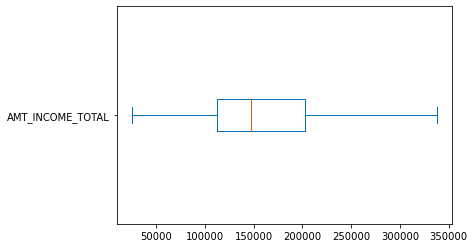

In [117]:
numeric['AMT_INCOME_TOTAL'].plot(kind='box', subplots=True, sharex=False, vert=False)

In [37]:
for i in range(len(col_names)):
    replace_upper(numeric, col_names[i])   
    
#------------------------------------------------------
for i in range(len(col_names)):
    replace_upper(numeric_test, col_names[i])

In [38]:
print("In train:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(upper_outlier(numeric,col_names[i]).shape[0])))
    
print("\n\n****************************************\n")
print("In test:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(upper_outlier(numeric_test,col_names[i]).shape[0])))

In train:

CNT_CHILDREN: 0
AMT_INCOME_TOTAL: 0
AMT_CREDIT: 0
AMT_ANNUITY: 0
AMT_GOODS_PRICE: 0
REGION_POPULATION_RELATIVE: 0
DAYS_EMPLOYED: 0
DAYS_REGISTRATION: 0
FLAG_MOBIL: 0
FLAG_EMP_PHONE: 0
FLAG_WORK_PHONE: 0
FLAG_CONT_MOBILE: 0
FLAG_EMAIL: 0
CNT_FAM_MEMBERS: 0
REGION_RATING_CLIENT: 0
REGION_RATING_CLIENT_W_CITY: 0
HOUR_APPR_PROCESS_START: 0
REG_REGION_NOT_LIVE_REGION: 0
REG_REGION_NOT_WORK_REGION: 0
LIVE_REGION_NOT_WORK_REGION: 0
REG_CITY_NOT_LIVE_CITY: 0
REG_CITY_NOT_WORK_CITY: 0
LIVE_CITY_NOT_WORK_CITY: 0
OBS_30_CNT_SOCIAL_CIRCLE: 0
DEF_30_CNT_SOCIAL_CIRCLE: 0
OBS_60_CNT_SOCIAL_CIRCLE: 0
DEF_60_CNT_SOCIAL_CIRCLE: 0
DAYS_LAST_PHONE_CHANGE: 0
FLAG_DOCUMENT_4: 0
FLAG_DOCUMENT_5: 0
FLAG_DOCUMENT_6: 0
FLAG_DOCUMENT_7: 0
FLAG_DOCUMENT_8: 0
FLAG_DOCUMENT_9: 0
FLAG_DOCUMENT_11: 0
FLAG_DOCUMENT_18: 0
AMT_REQ_CREDIT_BUREAU_HOUR: 0
AMT_REQ_CREDIT_BUREAU_DAY: 0
AMT_REQ_CREDIT_BUREAU_WEEK: 0
AMT_REQ_CREDIT_BUREAU_MON: 0
AMT_REQ_CREDIT_BUREAU_QRT: 0
AMT_REQ_CREDIT_BUREAU_YEAR: 0


**********

In [39]:
print("In train:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(lower_outlier(numeric,col_names[i]).shape[0])))
    
print("\n\n****************************************\n")
print("In test:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(lower_outlier(numeric_test,col_names[i]).shape[0])))

In train:

CNT_CHILDREN: 0
AMT_INCOME_TOTAL: 0
AMT_CREDIT: 0
AMT_ANNUITY: 0
AMT_GOODS_PRICE: 0
REGION_POPULATION_RELATIVE: 0
DAYS_EMPLOYED: 16843
DAYS_REGISTRATION: 659
FLAG_MOBIL: 1
FLAG_EMP_PHONE: 55386
FLAG_WORK_PHONE: 0
FLAG_CONT_MOBILE: 574
FLAG_EMAIL: 0
CNT_FAM_MEMBERS: 0
REGION_RATING_CLIENT: 32197
REGION_RATING_CLIENT_W_CITY: 34167
HOUR_APPR_PROCESS_START: 1661
REG_REGION_NOT_LIVE_REGION: 0
REG_REGION_NOT_WORK_REGION: 0
LIVE_REGION_NOT_WORK_REGION: 0
REG_CITY_NOT_LIVE_CITY: 0
REG_CITY_NOT_WORK_CITY: 0
LIVE_CITY_NOT_WORK_CITY: 0
OBS_30_CNT_SOCIAL_CIRCLE: 0
DEF_30_CNT_SOCIAL_CIRCLE: 0
OBS_60_CNT_SOCIAL_CIRCLE: 0
DEF_60_CNT_SOCIAL_CIRCLE: 0
DAYS_LAST_PHONE_CHANGE: 435
FLAG_DOCUMENT_4: 0
FLAG_DOCUMENT_5: 0
FLAG_DOCUMENT_6: 0
FLAG_DOCUMENT_7: 0
FLAG_DOCUMENT_8: 0
FLAG_DOCUMENT_9: 0
FLAG_DOCUMENT_11: 0
FLAG_DOCUMENT_18: 0
AMT_REQ_CREDIT_BUREAU_HOUR: 0
AMT_REQ_CREDIT_BUREAU_DAY: 0
AMT_REQ_CREDIT_BUREAU_WEEK: 0
AMT_REQ_CREDIT_BUREAU_MON: 0
AMT_REQ_CREDIT_BUREAU_QRT: 0
AMT_REQ_CREDIT_BU

In [40]:
for i in range(len(col_names)):
    replace_lower(numeric, col_names[i])
    
# #--------------------------------------------------
for i in range(len(col_names)):
    replace_lower(numeric_test, col_names[i])

In [41]:
print("In train:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(lower_outlier(numeric,col_names[i]).shape[0])))
    
print("\n\n****************************************\n")
print("In test:\n")
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(lower_outlier(numeric_test,col_names[i]).shape[0])))

In train:

CNT_CHILDREN: 0
AMT_INCOME_TOTAL: 0
AMT_CREDIT: 0
AMT_ANNUITY: 0
AMT_GOODS_PRICE: 0
REGION_POPULATION_RELATIVE: 0
DAYS_EMPLOYED: 0
DAYS_REGISTRATION: 0
FLAG_MOBIL: 0
FLAG_EMP_PHONE: 0
FLAG_WORK_PHONE: 0
FLAG_CONT_MOBILE: 0
FLAG_EMAIL: 0
CNT_FAM_MEMBERS: 0
REGION_RATING_CLIENT: 0
REGION_RATING_CLIENT_W_CITY: 0
HOUR_APPR_PROCESS_START: 0
REG_REGION_NOT_LIVE_REGION: 0
REG_REGION_NOT_WORK_REGION: 0
LIVE_REGION_NOT_WORK_REGION: 0
REG_CITY_NOT_LIVE_CITY: 0
REG_CITY_NOT_WORK_CITY: 0
LIVE_CITY_NOT_WORK_CITY: 0
OBS_30_CNT_SOCIAL_CIRCLE: 0
DEF_30_CNT_SOCIAL_CIRCLE: 0
OBS_60_CNT_SOCIAL_CIRCLE: 0
DEF_60_CNT_SOCIAL_CIRCLE: 0
DAYS_LAST_PHONE_CHANGE: 0
FLAG_DOCUMENT_4: 0
FLAG_DOCUMENT_5: 0
FLAG_DOCUMENT_6: 0
FLAG_DOCUMENT_7: 0
FLAG_DOCUMENT_8: 0
FLAG_DOCUMENT_9: 0
FLAG_DOCUMENT_11: 0
FLAG_DOCUMENT_18: 0
AMT_REQ_CREDIT_BUREAU_HOUR: 0
AMT_REQ_CREDIT_BUREAU_DAY: 0
AMT_REQ_CREDIT_BUREAU_WEEK: 0
AMT_REQ_CREDIT_BUREAU_MON: 0
AMT_REQ_CREDIT_BUREAU_QRT: 0
AMT_REQ_CREDIT_BUREAU_YEAR: 0


**********

Manage missing data

In [42]:
categorical_feature = train_new.dtypes==object
final_categorical_feature = train_new.columns[categorical_feature].tolist()

#----------------------------------------------------
categorical_feature_test = test_new.dtypes==object
final_categorical_feature_test = test_new.columns[categorical_feature_test].tolist()

In [43]:
categorical = train_new[final_categorical_feature]

#---------------------------------------------
categorical_test = test_new[final_categorical_feature_test]
categorical.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [44]:
pd.DataFrame(categorical.isnull().sum().sort_values(ascending = False))

,0
OCCUPATION_TYPE,96391
NAME_TYPE_SUITE,1292
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [45]:
pd.DataFrame(categorical_test.isnull().sum().sort_values(ascending = False))

,0
OCCUPATION_TYPE,15605
NAME_TYPE_SUITE,911
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [46]:
col_names_cat = categorical.columns

******************** NAME_CONTRACT_TYPE ********************



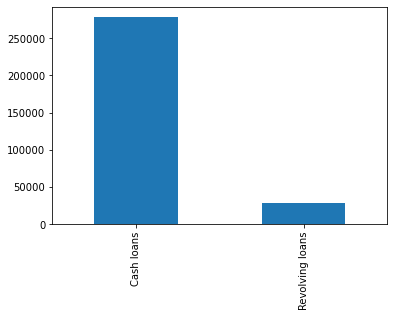

******************** CODE_GENDER ********************



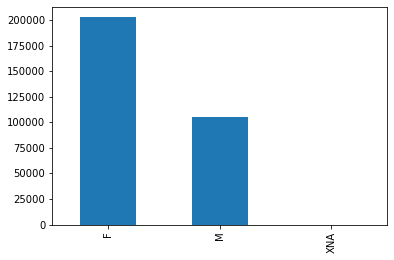

******************** FLAG_OWN_CAR ********************



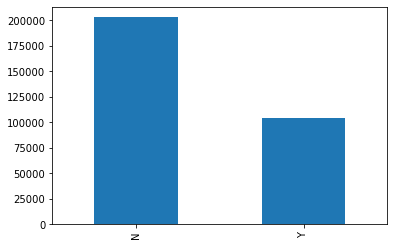

******************** FLAG_OWN_REALTY ********************



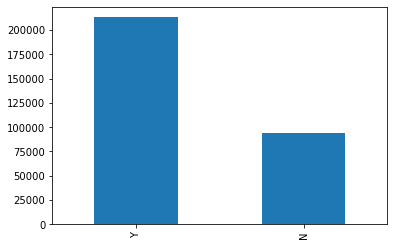

******************** NAME_TYPE_SUITE ********************



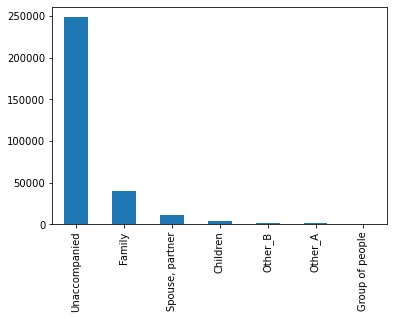

******************** NAME_INCOME_TYPE ********************



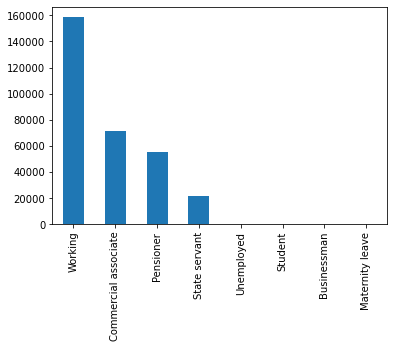

******************** NAME_EDUCATION_TYPE ********************



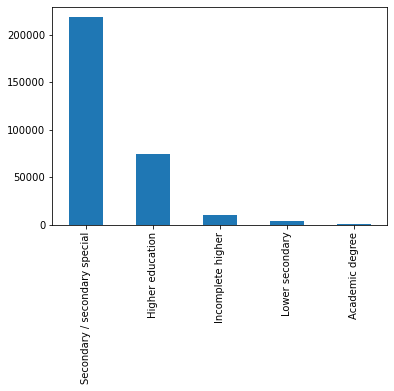

******************** NAME_FAMILY_STATUS ********************



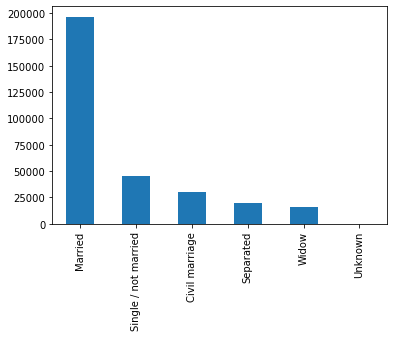

******************** NAME_HOUSING_TYPE ********************



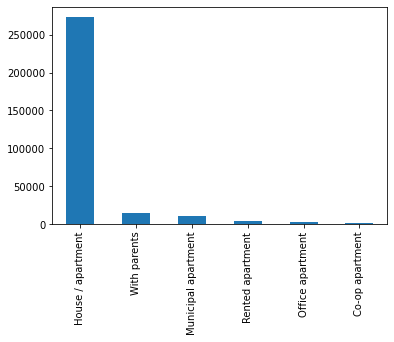

******************** OCCUPATION_TYPE ********************



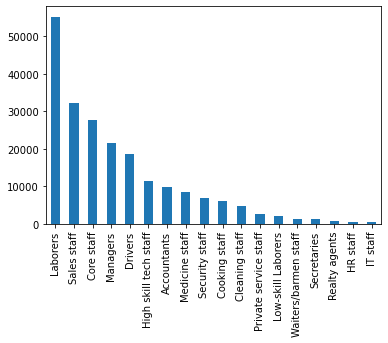

******************** WEEKDAY_APPR_PROCESS_START ********************



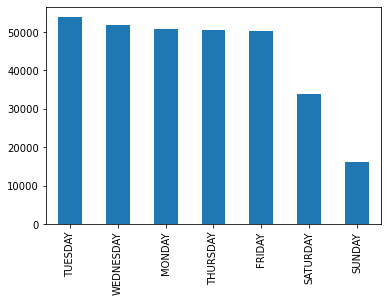

******************** ORGANIZATION_TYPE ********************



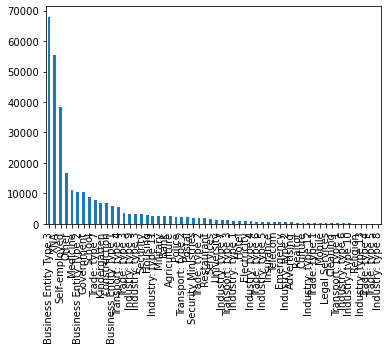

In [47]:
for i in range(len(col_names_cat)):
    preprocess_cat(categorical,col_names_cat[i])

In [48]:
print("In train:\n")
for i in range(len(col_names_cat)):
    replace_mode(categorical, col_names_cat[i])

print("\n\n****************************************\n")
print("In test:\n")
for i in range(len(col_names_cat)):
    replace_mode(categorical_test, col_names_cat[i])

In train:

NaN in NAME_CONTRACT_TYPE raplaced with Cash loans
NaN in CODE_GENDER raplaced with F
NaN in FLAG_OWN_CAR raplaced with N
NaN in FLAG_OWN_REALTY raplaced with Y
NaN in NAME_TYPE_SUITE raplaced with Unaccompanied
NaN in NAME_INCOME_TYPE raplaced with Working
NaN in NAME_EDUCATION_TYPE raplaced with Secondary / secondary special
NaN in NAME_FAMILY_STATUS raplaced with Married
NaN in NAME_HOUSING_TYPE raplaced with House / apartment
NaN in OCCUPATION_TYPE raplaced with Laborers
NaN in WEEKDAY_APPR_PROCESS_START raplaced with TUESDAY
NaN in ORGANIZATION_TYPE raplaced with Business Entity Type 3


****************************************

In test:

NaN in NAME_CONTRACT_TYPE raplaced with Cash loans
NaN in CODE_GENDER raplaced with F
NaN in FLAG_OWN_CAR raplaced with N
NaN in FLAG_OWN_REALTY raplaced with Y
NaN in NAME_TYPE_SUITE raplaced with Unaccompanied
NaN in NAME_INCOME_TYPE raplaced with Working
NaN in NAME_EDUCATION_TYPE raplaced with Secondary / secondary special
NaN in N

In [49]:
pd.DataFrame(categorical.isnull().sum().sort_values(ascending = False))


,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
NAME_TYPE_SUITE,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0
OCCUPATION_TYPE,0


In [50]:
pd.DataFrame(categorical_test.isnull().sum().sort_values(ascending = False))

,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
NAME_TYPE_SUITE,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0
OCCUPATION_TYPE,0


In [51]:
categorical.drop(['ORGANIZATION_TYPE'], axis=1, inplace=True)
# ---------------------------------------------
categorical_test.drop(['ORGANIZATION_TYPE'], axis=1, inplace=True)

In [52]:
categorical.columns


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START'],
      dtype='object')

In [53]:
le=LabelEncoder()
categorical=categorical.apply(lambda col_names_cat: le.fit_transform(col_names_cat))

categorical_test=categorical_test.apply(lambda col_names_cat: le.fit_transform(col_names_cat))
categorical.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START
0,0,1,0,1,6,7,4,3,1,8,6
1,0,0,0,0,1,4,1,1,1,3,1
2,1,1,1,1,6,7,4,3,1,8,1
3,0,0,0,1,6,7,4,0,1,8,6
4,0,1,0,1,6,7,4,3,1,3,4


In [54]:
print("In train: ",categorical.shape)
print("In test: ",categorical_test.shape)

In train:  (307511, 11)
In test:  (48744, 11)


In [55]:
col_names_cat = categorical.columns
col_names = numeric_test.columns

train_new[col_names_cat] = categorical[col_names_cat]
train_new[col_names] = numeric[col_names]

# ----------------------------------------------------
test_new[col_names] = numeric_test[col_names]
test_new[col_names_cat] = categorical_test[col_names_cat]


train_new.drop(['ORGANIZATION_TYPE'], axis=1, inplace=True)
test_new.drop(['ORGANIZATION_TYPE'], axis=1, inplace=True)

In [56]:
train_new[col_names].head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.000000
1,100003,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000
2,100004,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000
3,100006,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.899974
4,100007,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000


Manage duplicate data

In [58]:
print("In train: ",train_new.loc[train.duplicated()].shape)
#--------------------------------------------------
print("In test: ",test_new.loc[test.duplicated()].shape)

In train:  (0, 72)
In test:  (0, 71)


In [59]:
x_train = train_new.drop("TARGET", axis = 1)
y = train_new['TARGET']

In [60]:
scaler=MinMaxScaler()
col = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

x_train[col] = pd.DataFrame(scaler.fit_transform(x_train[col]))
test_new[col] = pd.DataFrame(scaler.transform(test_new[col]))

In [61]:
x_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0.0,0.5,0.0,1.0,0.0,0.567100,0.230079,0.384183,0.238754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133333
1,100003,0.0,0.0,0.0,0.0,0.0,0.783550,0.794402,0.567213,0.837370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,100004,1.0,0.5,1.0,1.0,0.0,0.134199,0.057266,0.085449,0.072664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,100006,0.0,0.0,0.0,1.0,0.0,0.350649,0.170322,0.467161,0.197232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.253330
4,100007,0.0,0.5,0.0,1.0,0.0,0.307359,0.297781,0.337003,0.363322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [62]:
y.head(20)

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: TARGET, dtype: int64

Modelling

In [63]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [64]:
from lightgbm import LGBMClassifier

In [65]:
#def RndSrch_Tune(model, X, y, params):
    
#     clf = RandomizedSearchCV(model, params, scoring ='roc_auc', cv = kfold, n_jobs=-1, random_state=100)
#     clf.fit(X, y)
#     print("best score is :" , clf.best_score_)
#     print("best estimator is :" , clf.best_estimator_)
#     print("best Params is :" , clf.best_params_)
#     return (clf.best_score_)

param_lgb = {'learning_rate':[0.2,0.1,0.01,0.05,0.001],
             'num_leaves':range(10,100,10),
             'min_child_samples':range(500,1000,100),
             'reg_alpha':[0.1,0.01,0.2,0.3],
             'reg_lambda':[0.1,0.01,0.2,0.3],
            'n_estimators':range(50,300,50),
             'max_bin': range(500,1500,100)}

RndSrch_Tune(LGBMClassifier(random_state = 100, n_jobs=-1, class_weight = 'balanced'), 
             x_train, y, param_lgb)

best score is : 0.749176396566525
best estimator is : LGBMClassifier(class_weight='balanced', learning_rate=0.05, max_bin=500,
               min_child_samples=600, n_estimators=250, num_leaves=10,
               random_state=100, reg_alpha=0.1, reg_lambda=0.1)
best Params is : {'reg_lambda': 0.1, 'reg_alpha': 0.1, 'num_leaves': 10, 'n_estimators': 250, 'min_child_samples': 600, 'max_bin': 500, 'learning_rate': 0.05}


0.749176396566525

In [66]:
lgb = LGBMClassifier(**{'reg_lambda': 0.1, 
                        'reg_alpha': 0.2, 
                        'num_leaves': 80, 
                        'n_estimators': 280, 
                        'min_child_samples': 800, 
                        'learning_rate': 0.05,
                        'max_bin': 500,
                        'objective': 'binary',
                        'n_jobs': -1,
                        'class_weight':'balanced',
                        'random_state':100})

scores = cross_validation(x_train, y, lgb)
print(scores)

Score: 0.749920
None


In [67]:
!pip install xgboost
# Value of hyperparameters for random search
from xgboost import XGBClassifier
# counter = Counter(y)
# estimate = counter[0] / counter[1]
# print('Estimate: %.3f' % estimate)
# param_xgbc = {'learning_rate':[0.2,0.1,0.01,0.05,0.001],
#              'subsample':[1,0.5,0.2,0.1],
#              'max_depth' : range(2,11,1),
#              'n_estimators':range(50,300,50)}

# RndSrch_Tune(XGBClassifier(random_state = 100, n_jobs=-1, scale_pos_weight=estimate), 
#              x_train, y, param_xgbc)

Defaulting to user installation because normal site-packages is not writeable


In [68]:
xgbc = XGBClassifier(learning_rate=0.2, 
                     max_depth=4, 
                     n_jobs=-1, 
                     random_state=100,
                     scale_pos_weight=11.387150050352467)

scores_xgbc = cross_validation(x_train, y, xgbc)
print(scores_xgbc)

Score: 0.749189
None


In [70]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(learning_rate=0.2, 
                         algorithm = 'SAMME.R',
                         n_estimators=200, 
                         random_state=100)
scores_ada = cross_validation(x_train, y, ada)
print(scores_ada)

Score: 0.743294
None


In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf=RandomForestClassifier()
scores_rf = cross_validation(x_train, y, rf)
print(scores_rf)

Score: 0.712480
None


In [75]:
classifiers = [lgb, xgbc, ada]
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for cls in classifiers:
    model = cls.fit(x_train, y)
    yproba = model.predict_proba(x_train)[::,1]
    
    fpr, tpr, _ = roc_curve(y,  yproba)
    auc = roc_auc_score(y, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

In [80]:
result_table

,fpr,tpr,auc
classifiers,,,
LGBMClassifier,"[0.0, 0.0, 0.0, 3.537493897823026e-06, 3.53749...","[0.0, 4.028197381671702e-05, 8.056394763343404...",0.834756
XGBClassifier,"[0.0, 3.537493897823026e-06, 3.537493897823026...","[0.0, 0.0, 0.00016112789526686808, 0.000161127...",0.773214
AdaBoostClassifier,"[0.0, 3.537493897823026e-06, 7.074987795646052...","[0.0, 0.0, 0.0, 0.00012084592145015106, 0.0001...",0.746


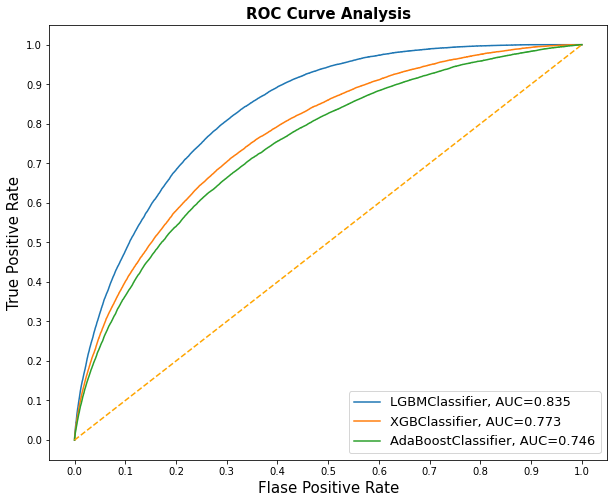

In [76]:
fig = plt.figure(figsize=(10,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc'])
             )
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [79]:
lgb.fit(x_train, y)
y_pred_LGB = lgb.predict(x_train)
y_pred_LGB_test = lgb.predict(test_new)

In [81]:
lgb.plot_importance(lgb, figsize=(12, 25), max_num_features=100);

AttributeError: 'LGBMClassifier' object has no attribute 'plot_importance'